In [1]:
import anndata
import numpy as np
import sys
import torch
import scvelo as scv
sys.path.append('../../../')
import velovae as vv
%load_ext autoreload
%autoreload 2

In [2]:
dataset = 'Erythroid'
# Uncomment this if you don't have the input file
# adata = scv.datasets.gastrulation_erythroid(file_path='data/download/Erythroid.h5ad')
# adata.obs["clusters"] = adata.obs["celltype"].to_numpy()
root = "/scratch/blaauw_root/blaauw1/gyichen"
adata = anndata.read_h5ad(f'{root}/data/{dataset}_pp.h5ad')

In [ ]:
# Uncomment this if you haven't preprocessed the anndats
# vv.preprocess(adata, n_gene=1000, min_shared_counts=20)
# adata.write_h5ad('data/Erythroid_pp.h5ad')

In [3]:
model_path_base = f'{root}/checkpoints/{dataset}'
figure_path_base = f'{root}/figures/{dataset}'
data_path = f'{root}/data/velovae/continuous/{dataset}'
gene_plot = ['Smim1', 'Blvrb', 'Hba-x', 'Lmo2']

# Informative Time Prior

In [4]:
capture_time = adata.obs['stage'].to_numpy()
tprior = np.array([float(x[1:]) for x in capture_time])
adata.obs['tprior'] = tprior

# VeloVAE

In [5]:
figure_path = f'{figure_path_base}/VeloVAE'
model_path = f'{model_path_base}/VeloVAE'

torch.manual_seed(2022)
np.random.seed(2022)

vae = vv.VAE(adata, 
             tmax=20, 
             dim_z=5, 
             device='cuda:0',
             init_method='tprior',
             init_key='tprior',
             tprior='tprior',
             init_ton_zero=False)

vae.train(adata, plot=False, gene_plot=gene_plot, figure_path=figure_path)

vae.save_model(model_path, 'encoder', 'decoder')
vae.save_anndata(adata, 'velovae', data_path, file_name=f'{dataset}.h5ad')

Estimating ODE parameters...


  0%|          | 0/1000 [00:00<?, ?it/s]

Detected 211 velocity genes.
Estimating the variance...


  0%|          | 0/1000 [00:00<?, ?it/s]

Initialization using prior time.
Reinitialize the regular ODE parameters based on estimated global latent time.


  0%|          | 0/1000 [00:00<?, ?it/s]

Initial induction: 126, repression: 874/1000
Using informative time prior.
Learning Rate based on Data Sparsity: 0.0001
--------------------------- Train a VeloVAE ---------------------------
*********        Creating Training/Validation Datasets        *********
*********                      Finished.                      *********
*********                 Creating optimizers                 *********
*********                      Finished.                      *********
*********                    Start training                   *********
*********                      Stage  1                       *********
Total Number of Iterations Per Epoch: 54, test iteration: 106
*********       Stage 1: Early Stop Triggered at epoch 391.       *********
*********                      Stage  2                       *********
*********             Velocity Refinement Round 1             *********


  0%|          | 0/9815 [00:00<?, ?it/s]

Percentage of Invalid Sets: 0.032
Average Set Size: 199
*********     Round 1: Early Stop Triggered at epoch 600.    *********
Change in noise variance: 1.1289
*********             Velocity Refinement Round 2             *********
*********     Round 2: Early Stop Triggered at epoch 701.    *********
Change in noise variance: 0.0007
Change in x0: 0.1288
*********             Velocity Refinement Round 3             *********
*********     Round 3: Early Stop Triggered at epoch 855.    *********
Change in noise variance: 0.0000
Change in x0: 0.0501
*********             Velocity Refinement Round 4             *********
*********     Round 4: Early Stop Triggered at epoch 960.    *********
Change in noise variance: 0.0000
Change in x0: 0.0383
*********             Velocity Refinement Round 5             *********
*********     Round 5: Early Stop Triggered at epoch 1015.    *********
Change in noise variance: 0.0000
Change in x0: 0.0341
*********             Velocity Refinement Round 6  

# FullVB

In [6]:
figure_path = f'{figure_path_base}/FullVB'
model_path = f'{model_path_base}/FullVB'

torch.manual_seed(2022)
np.random.seed(2022)

full_vb = vv.VAE(adata, 
                 tmax=20, 
                 dim_z=5, 
                 device='cuda:0',
                 init_method='tprior',
                 init_key='tprior',
                 tprior='tprior',
                 full_vb=True,
                 init_ton_zero=False)

full_vb.train(adata, plot=False, gene_plot=gene_plot, figure_path=figure_path)

full_vb.save_model(model_path, 'encoder', 'decoder')
full_vb.save_anndata(adata, 'fullvb', data_path, file_name=f'{dataset}.h5ad')

Estimating ODE parameters...


  0%|          | 0/1000 [00:00<?, ?it/s]

Detected 211 velocity genes.
Estimating the variance...


  0%|          | 0/1000 [00:00<?, ?it/s]

Initialization using prior time.
Reinitialize the regular ODE parameters based on estimated global latent time.


  0%|          | 0/1000 [00:00<?, ?it/s]

Initial induction: 126, repression: 874/1000
Using informative time prior.
Learning Rate based on Data Sparsity: 0.0001
--------------------------- Train a VeloVAE ---------------------------
*********        Creating Training/Validation Datasets        *********
*********                      Finished.                      *********
*********                 Creating optimizers                 *********
*********                      Finished.                      *********
*********                    Start training                   *********
*********                      Stage  1                       *********
Total Number of Iterations Per Epoch: 54, test iteration: 106
*********       Stage 1: Early Stop Triggered at epoch 297.       *********
*********                      Stage  2                       *********
*********             Velocity Refinement Round 1             *********


  0%|          | 0/9815 [00:00<?, ?it/s]

Percentage of Invalid Sets: 0.032
Average Set Size: 197
*********     Round 1: Early Stop Triggered at epoch 455.    *********
Change in noise variance: 1.0507
*********             Velocity Refinement Round 2             *********
*********     Round 2: Early Stop Triggered at epoch 512.    *********
Change in noise variance: 0.0010
Change in x0: 0.1608
*********             Velocity Refinement Round 3             *********
*********     Round 3: Early Stop Triggered at epoch 585.    *********
Change in noise variance: 0.0000
Change in x0: 0.1288
*********             Velocity Refinement Round 4             *********
*********     Round 4: Early Stop Triggered at epoch 601.    *********
Change in noise variance: 0.0000
Change in x0: 0.1430
*********             Velocity Refinement Round 5             *********
Stage 2: Early Stop Triggered at round 4.
*********              Finished. Total Time =   0 h :  7 m : 43 s             *********
Final: Train ELBO = 2514.038,	Test ELBO = 2491.

# Plotting

In [2]:
# Uncomment this if you have already pre-computed results
root = '/scratch/blaauw_root/blaauw1/gyichen'
dataset = 'Erythroid'
adata = anndata.read_h5ad(f'{root}/data/velovae/continuous/{dataset}/{dataset}_post.h5ad')

In [3]:
Ek = np.median(adata.layers['fullvb_velocity_u']**2 + adata.layers['fullvb_velocity']**2, 0)
gidx = np.argsort(Ek)[-4:]

---   Plotting  Results   ---


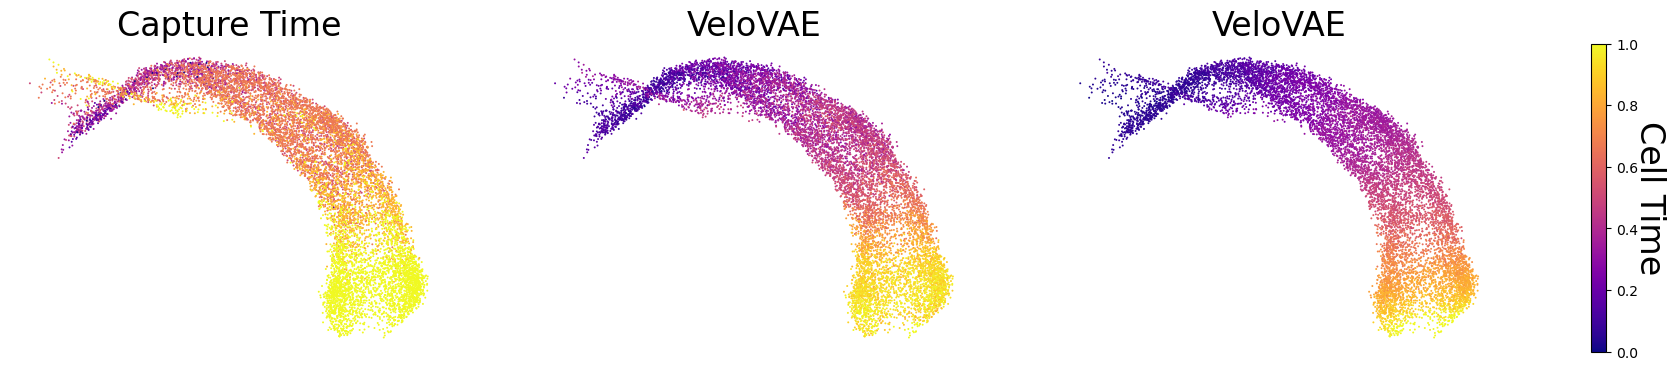

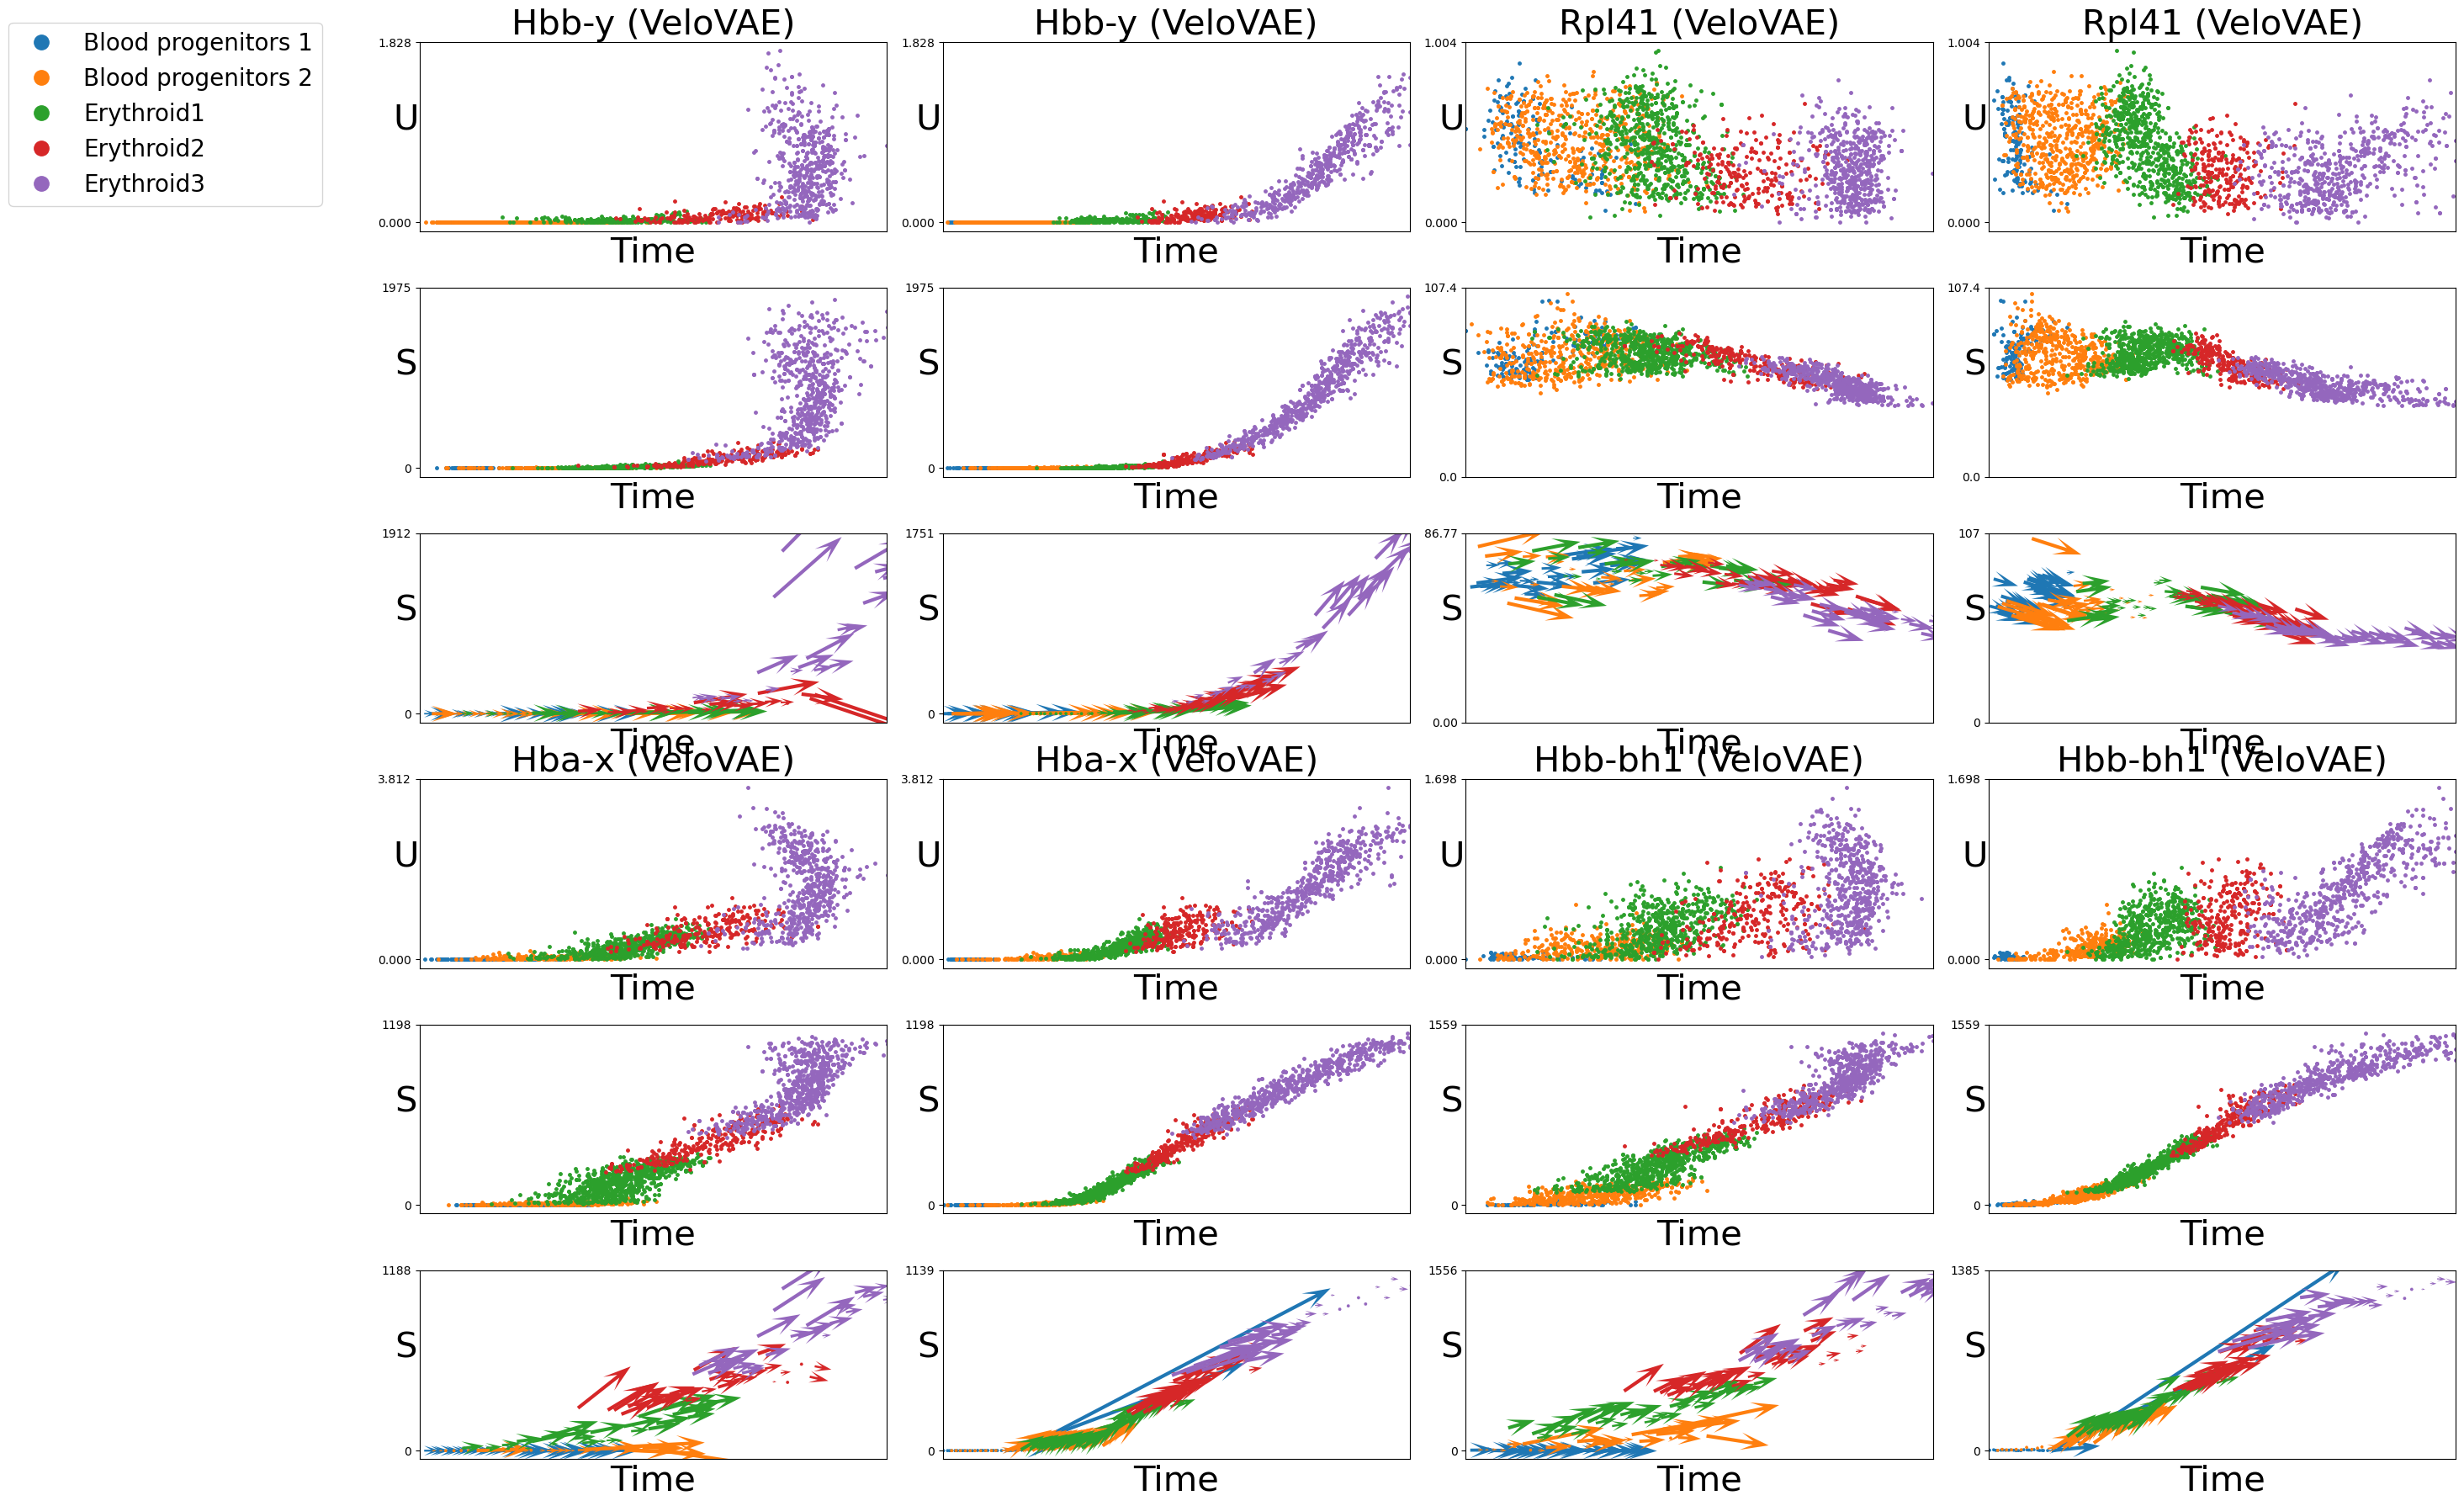

In [4]:
gene_plot = adata.var_names[gidx]
res, res_type = vv.post_analysis(adata,
                                 dataset,
                                 ['VeloVAE', 'FullVB'],
                                 ['velovae', 'fullvb'],
                                 compute_metrics=False,
                                 genes=gene_plot,
                                 plot_type=['time', 'gene'],
                                 grid_size=(2,2))

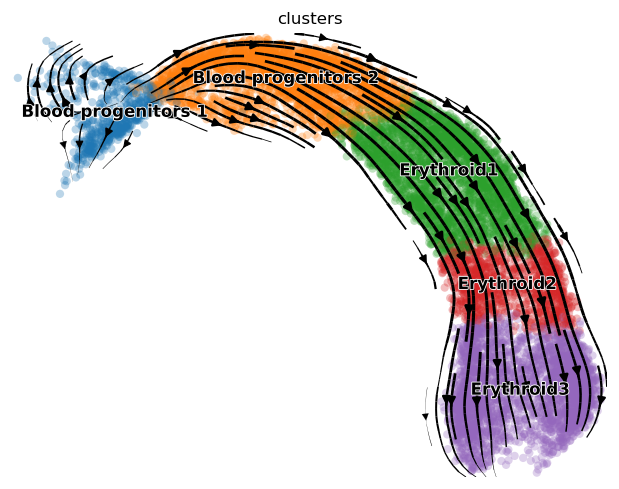

In [5]:
import scvelo as scv
scv.pl.velocity_embedding_stream(adata, vkey='fullvb_velocity', dpi=120)